# Testing re-orientation in shearflow + elongation.

The result should match Figure 5 in
Wang, Jin, O’Gara, John F., Tucker, Charles L: "An objective model for slow
orientation kinetics in concentrated fiber suspensions: Theory and rheological
evidence", Journal of Rheology, 52, 1179, 2008: DOI: 10.1122/1.2946437.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from fiberoripy.orientation import rsc_ode

In [3]:
# geometric factor
xi = 1.0

# time steps
t = np.linspace(0, 400, 500)

# initial fiber orientation state
A0 = 1.0 / 3.0 * np.eye(3)

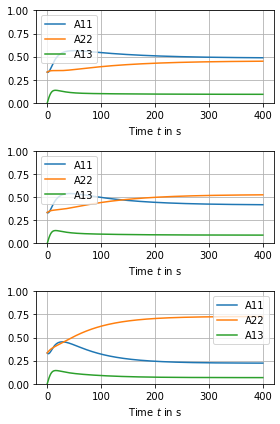

In [5]:
fig, axes = plt.subplots(3, 1, figsize=(4, 6))

for ax, ratio in zip(axes, [0.1, 0.12, 0.2]):

    def L(t):
        """Velocity gradient."""
        return np.array(
            [[-ratio, 0.0, 1.0], [0.0, ratio, 0.0], [0.0, 0.0, 0.0]]
        )

    # computed solution
    A = odeint(rsc_ode, A0.ravel(), t, args=(xi, L, 0.01, 0.1))

    ax.plot(t, A[:, 0], label="A11")
    ax.plot(t, A[:, 4], label="A22")
    ax.plot(t, A[:, 2], label="A13")

    ax.set_xlabel("Time $t$ in s")
    ax.set_ylim([0, 1])
    ax.grid()
    ax.legend()
plt.tight_layout()
plt.show()